In [1]:
import pandas as pd

# Автокорреляция и стационарность

## Вопрос 1.

Перед вами ряд значений среднегодового объёма популяции рыси:

<img src="./1/jtOO7oMVEealOA67wFuqoQ_ab96c0da1bb953be03153e7e61dd0217_all7.png?expiry=1487980800000&hmac=4rUMTXcQRVMylN_NnS6T278VkMC9N-zZ2GLotN2HMGI" width = 400/>

Какая из автокорреляционных функций соответствует этому ряду?

* <img src="./1/sT3fGYMWEeaQkhKk4jYr6Q_75f46bf2326da0fbdcec6b3cedf81322_acfeggs.png" width = 400/>
* <img src="./1/cqFG1YMWEeam4BLcQYZr8Q_e4f3e0f8fb1b6500b17c860a0eed264b_acfbeer.png" width = 400/>
* <img src="./1/qSe2ZIMWEead-BJkoDOYOw_34d227d2304b2afcc4961f2cb4584a23_acflynx.png" width = 400/>

4

## Вопрос 2

Перед вами ряд уровней среднемесячной номинальной заработной платы в России:

<img src="./2/LFqYh4MXEeazqQoyai5dlw_be032246383271c4bf5d355ef6a0d8b5_nomwage.png" width = 400/>

* Стационарность
* Автокоррелированность+
* Повышающийся тренд+
* Циклические колебания, соответствующие периодам активности в экономике
* Выраженная годовая сезонность+

## Вопрос 3

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

`monthly-milk-production.csv`

Загрузите ряд, например, так:

```python
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], 
  parse_dates=['month'], dayfirst=True)
```
и постройте его график. Какой из приведённых ниже графиков у вас получился?

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';',
                   index_col=['month'], parse_dates=['month'],
                   dayfirst=True)

In [3]:
from matplotlib import pylab as plt
%matplotlib inline

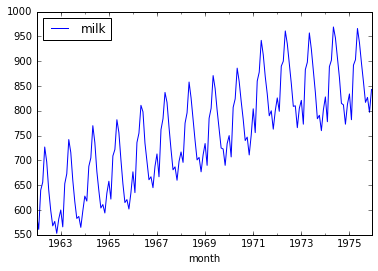

In [4]:
milk.plot()
plt.show()

## Вопрос 4

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера. Это делается так:

```python
import statsmodels.api as sm
sm.tsa.stattools.adfuller(ряд)
```

Чему равен полученный достигаемый уровень значимости? Округлите до двух знаков после десятичной точки.

In [5]:
import statsmodels.api as sm

In [6]:
result = sm.tsa.stattools.adfuller(milk.milk)

In [7]:
result

(-1.303811587422125,
 0.62742670860303362,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [8]:
round(0.62742670860303362,2)

0.63

## Вопрос 5

 
Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства `days_in_month` у индекса ряда или функции `monthrange` из пакета `calendar`. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.



В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [36]:
milk_day =pd.DataFrame(milk.milk/milk.index.days_in_month)

In [38]:
milk_day.milk.sum()

4166.326661899464